<style>
.markdown-apriori {
   background: linear-gradient(135deg,rgb(249, 248, 252) 0%, #e0e7ff 100%);
   border-radius: 12px;
   border: 1px solid #c7d2fe;
   padding: 24px 28px;
   margin-bottom: 24px;
   font-family: 'Segoe UI', 'Arial', sans-serif;
   color: #22223b;
   box-shadow: 0 2px 8px rgba(60, 60, 120, 0.07);
}
.markdown-apriori h1, .markdown-apriori h2, .markdown-apriori h3 {
   color: #3b5bdb;
   margin-top: 0;
}
.markdown-apriori table {
   border-collapse: collapse;
   width: 100%;
   margin: 18px 0;
   background: #f1f5fd;
   border-radius: 8px;
   overflow: hidden;
}
.markdown-apriori th, .markdown-apriori td {
   border: 1px solid #b6c6f5;
   padding: 8px 12px;
   text-align: left;
}
.markdown-apriori th {
   background: #a5b4fc;
   color: #22223b;
   font-weight: bold;
}
.markdown-apriori tr:nth-child(even) {
   background: #e0e7ff;
}
.markdown-apriori code {
   background: #e0e7ff;
   color: #3b5bdb;
   padding: 2px 6px;
   border-radius: 4px;
   font-size: 95%;
}
.markdown-apriori ul {
   margin-left: 1.2em;
}
.markdown-apriori .pros {
   color: #059669;
   font-weight: bold;
}
.markdown-apriori .cons {
   color: #e11d48;
   font-weight: bold;
}
</style>

<div class="markdown-apriori">

<h2>🌟 <span style="color:#3b5bdb;">Apriori Algorithm</span> Overview</h2>

The <b>Apriori algorithm</b> finds frequent itemsets and association rules in transaction data (e.g., market baskets).

---

<h3>🔑 Key Concepts</h3>
<ul>
   <li><b>Itemset</b>: Group of items (e.g., <code>{bread, milk}</code>).</li>
   <li><b>Support</b>: Fraction of transactions containing an itemset.</li>
   <li><b>Confidence</b>: Likelihood that B is bought when A is bought.</li>
   <li><b>Lift</b>: How much more likely B is bought with A than alone.</li>
</ul>

---

<h3>⚙️ How It Works</h3>
<ol>
   <li>Set minimum support/confidence.</li>
   <li>Find frequent itemsets (all subsets must be frequent).</li>
   <li>Generate rules <code>A → B</code> that meet thresholds.</li>
</ol>

---

<h3>🧾 Example</h3>

<table>
<thead>
<tr>
<th>Transaction</th>
<th>Items</th>
</tr>
</thead>
<tbody>
<tr>
<td>1</td>
<td>Milk, Bread, Butter</td>
</tr>
<tr>
<td>2</td>
<td>Bread, Butter</td>
</tr>
<tr>
<td>...</td>
<td>...</td>
</tr>
</tbody>
</table>

<ul>
   <li>Frequent 1-itemsets: <span style="color:#3b5bdb;">Milk (0.6)</span>, <span style="color:#3b5bdb;">Bread (0.8)</span>, <span style="color:#3b5bdb;">Butter (0.8)</span></li>
   <li>Frequent 2-itemsets: <span style="color:#3b5bdb;">{Milk, Bread} (0.4)</span>, <span style="color:#3b5bdb;">{Bread, Butter} (0.6)</span></li>
   <li>Rule: <code>Bread → Butter</code> (Confidence: <span style="color:#059669;">0.75</span>, Lift: <span style="color:#eab308;">0.94</span>)</li>
</ul>

---

<h3>👍 Pros &amp; 👎 Cons</h3>
<ul>
   <li><span class="pros">+</span> Simple, effective for small/medium data</li>
   <li><span class="cons">–</span> Slow for large data, many candidates, multiple scans</li>
</ul>

---

<h3>📊 Output Example</h3>

<table>
<thead>
<tr>
<th>Base</th>
<th>Add</th>
<th>Support</th>
<th>Confidence</th>
<th>Lift</th>
</tr>
</thead>
<tbody>
<tr>
<td>[butter]</td>
<td>[bread]</td>
<td>0.6</td>
<td>75%</td>
<td>1.25</td>
</tr>
</tbody>
</table>

</div>


In [49]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import warnings
import warnings
warnings.filterwarnings("ignore")

#
<div style="background: linear-gradient(135deg, rgb(103, 23, 103), rgb(47, 67, 107)); padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(109, 42, 42, 0.1); color: white;">
   <h2 style="font-weight: bold;"> Now Lets Apply On Real World Dataset </h2>
</div>

In [50]:
#load dataset
df = pd.read_csv('Groceries_dataset.csv')

In [51]:
#now show all rowws and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [52]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


#
<div style="background: linear-gradient(135deg, rgb(103, 23, 103), rgb(47, 67, 107)); padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(109, 42, 42, 0.1); color: white;">
   <h2 style="font-weight: bold;"> Exlploratory data analysis </h2>
</div>

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [54]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [55]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [56]:
#give unique member_numbers
member_numbers = []
for i in df['Member_number']:
    if i not in member_numbers:
        member_numbers.append(i)
print("Total unique members:", len(member_numbers))

Total unique members: 3898


In [57]:
#make date dtype
df['Date'] = pd.to_datetime(df['Date'])

In [58]:
#from which date the data starts and ends, including years, months, and days
start_date = pd.to_datetime(df['Date'].min())
end_date = pd.to_datetime(df['Date'].max())

print("Data starts from:", start_date)
print("Data ends at:", end_date)
print(f"Years: {end_date.year - start_date.year}")
print(f"Months: {(end_date.year - start_date.year) * 12 + (end_date.month - start_date.month)}")
print(f"Days: {(end_date - start_date).days}")


Data starts from: 2014-01-01 00:00:00
Data ends at: 2015-12-30 00:00:00
Years: 1
Months: 23
Days: 728


In [59]:
#how many items are there in the dataset
print("Number of Total items in the dataset:", len(df))
#how many unique items are there in the dataset
print("Number of Total unique items in the dataset:", df['itemDescription'].nunique())

Number of Total items in the dataset: 38765
Number of Total unique items in the dataset: 167


<style>
.stats-apriori {
    background: linear-gradient(120deg, #f0f4ff 0%, #e0e7ff 100%);
    border-radius: 16px;
    border: 2px solid #6366f1;
    padding: 32px 36px;
    margin-bottom: 28px;
    font-family: 'Segoe UI', 'Arial', sans-serif;
    color: #232946;
    box-shadow: 0 4px 16px rgba(99, 102, 241, 0.10);
}
.stats-apriori h2 {
    color: #4f46e5;
    margin-top: 0;
    letter-spacing: 1px;
    font-size: 2em;
    font-weight: 700;
}
.stats-apriori .stat-key {
    color: #6366f1;
    font-weight: bold;
    font-size: 1.15em;
    letter-spacing: 0.5px;
}
.stats-apriori .stat-value {
    color: #059669;
    font-weight: bold;
    font-size: 1.15em;
    background: #e0f2fe;
    border-radius: 6px;
    padding: 2px 10px;
    margin-left: 6px;
    margin-right: 6px;
    box-shadow: 0 1px 4px #a7f3d0;
}
.stats-apriori ul {
    margin-left: 0;
    padding-left: 0;
    list-style: none;
}
.stats-apriori li {
    margin-bottom: 10px;
    font-size: 1.08em;
    display: flex;
    align-items: center;
}
.stats-apriori .icon {
    font-size: 1.3em;
    margin-right: 10px;
    color: #f59e42;
}
.stats-apriori .date-icon {
    color: #6366f1;
}
.stats-apriori .calendar {
    color: #f43f5e;
}
.stats-apriori .clock {
    color: #f59e42;
}
.stats-apriori .item-table {
    border-collapse: collapse;
    width: 100%;
    margin: 18px 0;
    background: #f1f5fd;
    border-radius: 8px;
    overflow: hidden;
}
.stats-apriori th, .stats-apriori td {
    border: 1px solid #b6c6f5;
    padding: 8px 12px;
    text-align: left;
}
.stats-apriori th {
    background: #a5b4fc;
    color: #22223b;
    font-weight: bold;
}
.stats-apriori tr:nth-child(even) {
    background: #e0e7ff;
}
.stats-apriori code {
    background: #e0e7ff;
    color: #3b5bdb;
    padding: 2px 6px;
    border-radius: 4px;
    font-size: 95%;
}
</style>

<div class="stats-apriori">

<h2>🛒 Dataset Quick Stats</h2>

<ul>
    <li><span class="stat-key">Unique Items:</span> <span class="stat-value">167</span></li>
    <li><span class="stat-key">Unique Members:</span> <span class="stat-value">3,898</span></li>
    <li><span class="stat-key">Unique Transactions:</span> <span class="stat-value">14,963</span></li>
    <li><span class="stat-key">Total Items (Rows):</span> <span class="stat-value">38,765</span></li>
</ul>

<ul>
    <li><span class="stat-key">Data starts from:</span> <span class="stat-value">2014-01-01</span></li>
    <li><span class="stat-key">Data ends at:</span> <span class="stat-value">2015-12-30</span></li>
    <li><span class="stat-key">Years:</span> <span class="stat-value">1</span></li>
    <li><span class="stat-key">Months:</span> <span class="stat-value">23</span></li>
    <li><span class="stat-key">Days:</span> <span class="stat-value">728</span></li>
</ul>

</div>

#
<div style="background: linear-gradient(135deg, rgb(103, 23, 103), rgb(47, 67, 107)); padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(109, 42, 42, 0.1); color: white;">
   <h2 style="font-weight: bold;"> Lets make a list of products bought by the same customer on the same date </h2>
</div>

In [60]:
# Grouping dataset to form a list of products bought by the same customer on the same date
df = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index(name='Basket')

In [61]:
df.head()

,Member_number,Date,Basket
0,1000,2014-06-24,"[whole milk, pastry, salty snack]"
1,1000,2015-03-15,"[sausage, whole milk, semi-finished bread, yog..."
2,1000,2015-05-27,"[soda, pickled vegetables]"
3,1000,2015-07-24,"[canned beer, misc. beverages]"
4,1000,2015-11-25,"[sausage, hygiene articles]"


#
<div style="background: linear-gradient(135deg, rgb(103, 23, 103), rgb(47, 67, 107)); padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(109, 42, 42, 0.1); color: white;">
   <h2 style="font-weight: bold;"> Let's create a count of unique transactions to see the transaction count, which is based on the combination of `Member_number` and `Date`.
 </h2>
</div>

In [62]:
#lets create a count of unique Transaction which is a combination of Member_number and Date  
df['Transaction'] = df.groupby(['Member_number', 'Date']).ngroup()
df['Member_Transaction_Count'] = df.groupby('Member_number')['Transaction'].transform('count')

#
<div style="background: linear-gradient(135deg, rgb(103, 23, 103), rgb(47, 67, 107)); padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(109, 42, 42, 0.1); color: white;">
   <h2 style="font-weight: bold;"> Top 10 Most Frequent Items
 </h2>
</div>

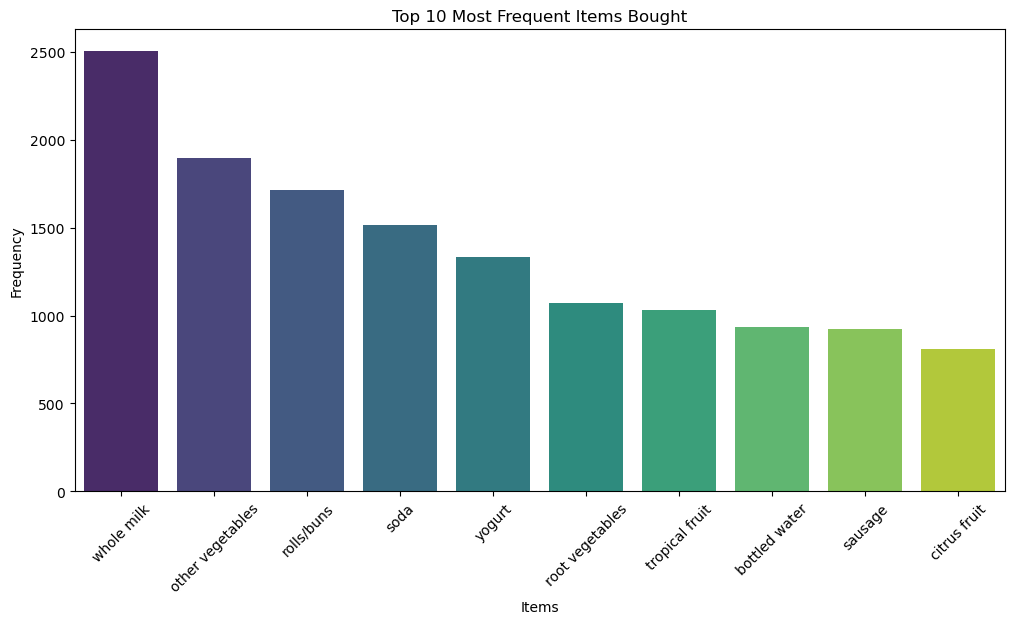

In [63]:
#visualise top 10 most frquent items
top_items = df['Basket'].explode().value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_items.index, y=top_items.values, palette='viridis')
plt.title('Top 10 Most Frequent Items Bought')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [64]:
df['Basket'].explode().value_counts().head(10)

Basket
whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: count, dtype: int64

<style>
.top-items-colu {
    background: linear-gradient(120deg, #f0f4ff 0%, #e0e7ff 100%);
    border-radius: 16px;
    border: 2px solid #6366f1;
    padding: 32px 36px;
    margin-bottom: 28px;
    font-family: 'Segoe UI', 'Arial', sans-serif;
    color: #232946;
    box-shadow: 0 4px 16px rgba(99, 102, 241, 0.10);
    max-width: 700px;
}
.top-items-colu h2 {
    color: #4f46e5;
    margin-top: 0;
    letter-spacing: 1px;
    font-size: 2em;
    font-weight: 700;
}
.top-items-colu .item-list {
    display: flex;
    flex-wrap: wrap;
    gap: 24px;
    margin-top: 18px;
}
.top-items-colu .item-col {
    flex: 1 1 220px;
    background: #e0e7ff;
    border-radius: 10px;
    padding: 18px 20px;
    box-shadow: 0 2px 8px rgba(99, 102, 241, 0.07);
    margin-bottom: 12px;
}
.top-items-colu .item-col h3 {
    color: #6366f1;
    margin: 0 0 10px 0;
    font-size: 1.15em;
    font-weight: 600;
}
.top-items-colu .item-col ul {
    list-style: none;
    padding: 0;
    margin: 0;
}
.top-items-colu .item-col li {
    font-size: 1.08em;
    margin-bottom: 7px;
    display: flex;
    align-items: center;
}
.top-items-colu .rank {
    background: #6366f1;
    color: #fff;
    border-radius: 50%;
    width: 1.7em;
    height: 1.7em;
    display: inline-flex;
    align-items: center;
    justify-content: center;
    font-weight: bold;
    margin-right: 10px;
    font-size: 1em;
}
.top-items-colu .count {
    color: #059669;
    font-weight: bold;
    margin-left: 8px;
    font-size: 0.98em;
}
</style>

<div class="top-items-colu">

<h2>🥇 Top 10 Most Frequent Items</h2>

<div class="item-list">
    <div class="item-col">
        <h3>Rank 1–5</h3>
        <ul>
            <li><span class="rank">1</span> whole milk <span class="count">2502</span></li>
            <li><span class="rank">2</span> other vegetables <span class="count">1898</span></li>
            <li><span class="rank">3</span> rolls/buns <span class="count">1716</span></li>
            <li><span class="rank">4</span> soda <span class="count">1514</span></li>
            <li><span class="rank">5</span> yogurt <span class="count">1334</span></li>
        </ul>
    </div>
    <div class="item-col">
        <h3>Rank 6–10</h3>
        <ul>
            <li><span class="rank">6</span> root vegetables <span class="count">1071</span></li>
            <li><span class="rank">7</span> tropical fruit <span class="count">1032</span></li>
            <li><span class="rank">8</span> bottled water <span class="count">933</span></li>
            <li><span class="rank">9</span> sausage <span class="count">924</span></li>
            <li><span class="rank">10</span> citrus fruit <span class="count">812</span></li>
        </ul>
    </div>
</div>

</div>

#
<div style="background: linear-gradient(135deg, rgb(103, 23, 103), rgb(47, 67, 107)); padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(109, 42, 42, 0.1); color: white;">
   <h2 style="font-weight: bold;"> Number of Transactions per Member
 </h2>
</div>

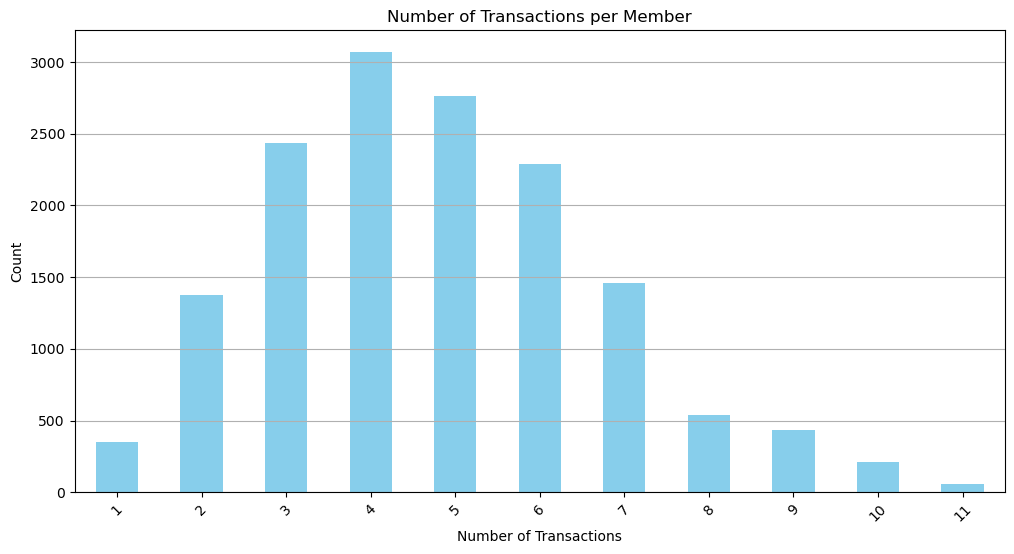

In [65]:
df["Member_Transaction_Count"].value_counts().sort_index().plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Number of Transactions per Member')
plt.xlabel('Number of Transactions')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [66]:
df["Member_Transaction_Count"].mean()

np.float64(4.762748112009624)

In [67]:
# Get members who made exactly 4 transactions
members_with_4_transactions = df[df['Member_Transaction_Count'] == 4]['Member_number'].unique()

# Get all transactions for these members
transactions_4 = df[df['Member_number'].isin(members_with_4_transactions)]

# Get item frequencies for these transactions
item_counts = []
for basket in transactions_4['Basket']:
    item_counts.extend(basket)

item_frequencies = pd.Series(item_counts).value_counts()

# Display top items bought by members with 4 transactions
print("Top items bought by members who made 4 transactions:")
print(item_frequencies.head(10))

Top items bought by members who made 4 transactions:
whole milk          512
rolls/buns          380
other vegetables    360
yogurt              287
soda                280
root vegetables     230
tropical fruit      218
bottled water       203
sausage             179
pip fruit           171
Name: count, dtype: int64


<style>
.top-4-transactions {
    background: linear-gradient(120deg, #f0f4ff 0%, #e0e7ff 100%);
    border-radius: 16px;
    border: 2px solid #6366f1;
    padding: 32px 36px;
    margin-bottom: 28px;
    font-family: 'Segoe UI', 'Arial', sans-serif;
    color: #232946;
    box-shadow: 0 4px 16px rgba(99, 102, 241, 0.10);
    max-width: 700px;
}
.top-4-transactions h2 {
    color: #4f46e5;
    margin-top: 0;
    letter-spacing: 1px;
    font-size: 2em;
    font-weight: 700;
}
.top-4-transactions table {
    border-collapse: collapse;
    width: 100%;
    margin: 18px 0;
    background: #f1f5fd;
    border-radius: 8px;
    overflow: hidden;
}
.top-4-transactions th, .top-4-transactions td {
    border: 1px solid #b6c6f5;
    padding: 8px 12px;
    text-align: left;
}
.top-4-transactions th {
    background: #a5b4fc;
    color: #22223b;
    font-weight: bold;
}
.top-4-transactions tr:nth-child(even) {
    background: #e0e7ff;
}
.top-4-transactions .rank {
    background: #6366f1;
    color: #fff;
    border-radius: 50%;
    width: 1.7em;
    height: 1.7em;
    display: inline-flex;
    align-items: center;
    justify-content: center;
    font-weight: bold;
    margin-right: 10px;
    font-size: 1em;
}
.top-4-transactions .count {
    color: #059669;
    font-weight: bold;
    margin-left: 8px;
    font-size: 0.98em;
}
</style>

<div class="top-4-transactions">

<h2>🛍️ Top Items Bought by Members with 4 Transactions</h2>

<table>
<thead>
<tr>
    <th>Rank</th>
    <th>Item</th>
    <th>Count</th>
</tr>
</thead>
<tbody>
<tr><td><span class="rank">1</span></td><td>whole milk</td><td class="count">512</td></tr>
<tr><td><span class="rank">2</span></td><td>rolls/buns</td><td class="count">380</td></tr>
<tr><td><span class="rank">3</span></td><td>other vegetables</td><td class="count">360</td></tr>
<tr><td><span class="rank">4</span></td><td>yogurt</td><td class="count">287</td></tr>
<tr><td><span class="rank">5</span></td><td>soda</td><td class="count">280</td></tr>
<tr><td><span class="rank">6</span></td><td>root vegetables</td><td class="count">230</td></tr>
<tr><td><span class="rank">7</span></td><td>tropical fruit</td><td class="count">218</td></tr>
<tr><td><span class="rank">8</span></td><td>bottled water</td><td class="count">203</td></tr>
<tr><td><span class="rank">9</span></td><td>sausage</td><td class="count">179</td></tr>
<tr><td><span class="rank">10</span></td><td>pip fruit</td><td class="count">171</td></tr>
</tbody>
</table>

</div>

In [68]:
df.head()

,Member_number,Date,Basket,Transaction,Member_Transaction_Count
0,1000,2014-06-24,"[whole milk, pastry, salty snack]",0,5
1,1000,2015-03-15,"[sausage, whole milk, semi-finished bread, yog...",1,5
2,1000,2015-05-27,"[soda, pickled vegetables]",2,5
3,1000,2015-07-24,"[canned beer, misc. beverages]",3,5
4,1000,2015-11-25,"[sausage, hygiene articles]",4,5


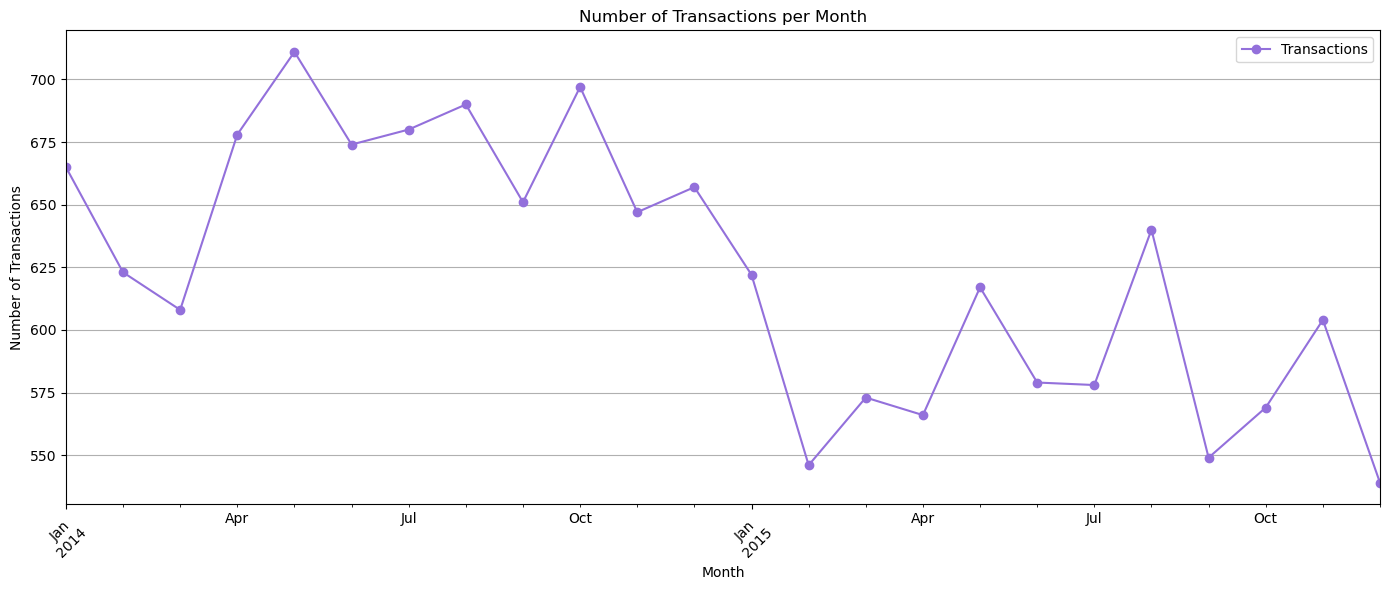

In [69]:
# Extract month from the 'Date' column and count transactions per month
df['Month'] = df['Date'].dt.to_period('M')
monthly_transactions = df['Month'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
monthly_transactions.plot(kind='line', marker='o', color='mediumpurple')
plt.title('Number of Transactions per Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.legend(['Transactions', 'Increase'])
plt.tight_layout()
plt.show()

<style>
.monthly-insights {
    background: linear-gradient(120deg, #f0f4ff 0%, #e0e7ff 100%);
    border-radius: 16px;
    border: 2px solid #6366f1;
    padding: 32px 36px;
    margin-bottom: 28px;
    font-family: 'Segoe UI', 'Arial', sans-serif;
    color: #232946;
    box-shadow: 0 4px 16px rgba(99, 102, 241, 0.10);
    max-width: 800px;
}
.monthly-insights h2 {
    color: #4f46e5;
    margin-top: 0;
    letter-spacing: 1px;
    font-size: 2em;
    font-weight: 700;
}
.monthly-insights ul {
    margin-left: 0;
    padding-left: 1.2em;
    list-style: disc;
}
.monthly-insights li {
    font-size: 1.08em;
    margin-bottom: 10px;
}
.monthly-insights .highlight {
    color: #059669;
    font-weight: bold;
    background: #e0f2fe;
    border-radius: 6px;
    padding: 2px 8px;
    margin: 0 4px;
}
.monthly-insights .increase {
    color: #f59e42;
    font-weight: bold;
}
.monthly-insights .high {
    color: #e11d48;
    font-weight: bold;
}
.monthly-insights .low {
    color: #6366f1;
    font-weight: bold;
}
</style>

<div class="monthly-insights">

<h2>📈 Insights from the Monthly Transactions Line Chart</h2>

<ul>
    <li>The number of transactions fluctuates month to month, with no strong upward or downward trend over the two years.</li>
    <li>Several months show <span class="increase">increases</span> in transactions compared to the previous month, notably in:
        <ul>
            <li><span class="highlight">2014:</span> <span class="increase">April, May, July, August, October, December</span></li>
            <li><span class="highlight">2015:</span> <span class="increase">March, May, August, October, November</span></li>
        </ul>
    </li>
    <li>The <span class="high">highest transaction counts</span> are observed in <span class="highlight">May 2014 (711)</span> and <span class="highlight">October 2014 (697)</span>.</li>
    <li>The <span class="low">lowest transaction counts</span> are seen in <span class="highlight">February 2015 (546)</span> and <span class="highlight">December 2015 (539)</span>.</li>
    <li>Seasonal effects may be present, as some months consistently show increases, possibly due to holidays or promotions.</li>
    <li>Overall, the transaction volume remains relatively stable, indicating consistent customer engagement throughout the period.</li>
</ul>

</div>

#
<div style="background: linear-gradient(135deg, rgb(103, 23, 103), rgb(47, 67, 107)); padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(109, 42, 42, 0.1); color: white;">
   <h2 style="font-weight: bold;"> Lets apply apriori algoithm
 </h2>
</div>

In [70]:
# Prepare transactions list from the 'Basket' column
transactions = df['Basket'].tolist()

#applying apriori
from apyori import apriori
rules = apriori(transactions, min_support=0.00030, min_confidence=0.05, min_lift=2, min_length=2)
results = list(rules)
results

[RelationRecord(items=frozenset({'artif. sweetener', 'soda'}), support=0.00046782062420637575, ordered_statistics=[OrderedStatistic(items_base=frozenset({'artif. sweetener'}), items_add=frozenset({'soda'}), confidence=0.2413793103448276, lift=2.4857251346797353)]),
 RelationRecord(items=frozenset({'condensed milk', 'berries'}), support=0.0003341575887188398, ordered_statistics=[OrderedStatistic(items_base=frozenset({'condensed milk'}), items_add=frozenset({'berries'}), confidence=0.05102040816326531, lift=2.34177413296607)]),
 RelationRecord(items=frozenset({'whole milk', 'brandy'}), support=0.0008688097306689834, ordered_statistics=[OrderedStatistic(items_base=frozenset({'brandy'}), items_add=frozenset({'whole milk'}), confidence=0.34210526315789475, lift=2.1662805978127717)]),
 RelationRecord(items=frozenset({'sweet spreads', 'butter'}), support=0.0003341575887188398, ordered_statistics=[OrderedStatistic(items_base=frozenset({'sweet spreads'}), items_add=frozenset({'butter'}), confid

#
<div style="background: linear-gradient(135deg, rgb(103, 23, 103), rgb(47, 67, 107)); padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(109, 42, 42, 0.1); color: white;">
   <h2 style="font-weight: bold;"> Now Lets See The Results
 </h2>
</div>

In [71]:
import pandas as pd

rules_data = []
for rule in results:
    items = list(rule.items)
    support = rule.support
    for ordered_stat in rule.ordered_statistics:
        base = list(ordered_stat.items_base)
        add = list(ordered_stat.items_add)
        confidence = ordered_stat.confidence
        lift = ordered_stat.lift
        rules_data.append({
            'Base': base,
            'Add': add,
            'Support': support,
            'Confidence': confidence,
            'Lift': lift
        })

rules_df = pd.DataFrame(rules_data)
rules_df.head()

,Base,Add,Support,Confidence,Lift
0,[artif. sweetener],[soda],0.000468,0.241379,2.485725
1,[condensed milk],[berries],0.000334,0.051020,2.341774
2,[brandy],[whole milk],0.000869,0.342105,2.166281
3,[sweet spreads],[butter],0.000334,0.073529,2.087705
4,[liver loaf],[canned beer],0.000401,0.120000,2.557778


<style>
.rule-explanation {
   background: linear-gradient(120deg, #f0f4ff 0%, #e0e7ff 100%);
   border-radius: 18px;
   border: 2px solid #6366f1;
   padding: 36px 40px;
   margin-bottom: 32px;
   font-family: 'Segoe UI', 'Arial', sans-serif;
   color: #232946;
   box-shadow: 0 4px 18px rgba(99, 102, 241, 0.12);
   max-width: 900px;
}
.rule-explanation h2 {
   color: #4f46e5;
   margin-top: 0;
   letter-spacing: 1px;
   font-size: 2.1em;
   font-weight: 800;
}
.rule-explanation table {
   border-collapse: collapse;
   width: 100%;
   margin: 22px 0 28px 0;
   background: #f1f5fd;
   border-radius: 10px;
   overflow: hidden;
   box-shadow: 0 2px 8px rgba(99, 102, 241, 0.07);
}
.rule-explanation th, .rule-explanation td {
   border: 1px solid #b6c6f5;
   padding: 10px 14px;
   text-align: left;
}
.rule-explanation th {
   background: #a5b4fc;
   color: #22223b;
   font-weight: bold;
   font-size: 1.08em;
}
.rule-explanation tr:nth-child(even) {
   background: #e0e7ff;
}
.rule-explanation .highlight {
   color: #059669;
   font-weight: bold;
   background: #e0f2fe;
   border-radius: 6px;
   padding: 2px 8px;
   margin: 0 4px;
}
.rule-explanation .lift {
   color: #f59e42;
   font-weight: bold;
}
.rule-explanation .support {
   color: #6366f1;
   font-weight: bold;
}
.rule-explanation .confidence {
   color: #e11d48;
   font-weight: bold;
}
.rule-explanation ul {
   margin-left: 0;
   padding-left: 1.2em;
   list-style: disc;
}
.rule-explanation li {
   font-size: 1.08em;
   margin-bottom: 10px;
}
.rule-explanation code {
   background: #e0e7ff;
   color: #3b5bdb;
   padding: 2px 8px;
   border-radius: 4px;
   font-size: 97%;
}
</style>

<div class="rule-explanation">

<h2>🧮 Understanding the Apriori Association Rules Table</h2>

<p>
This table contains the results from applying the <b>Apriori algorithm</b> to a <b>market basket dataset</b> (likely from a grocery store), showing <b>association rules</b> between items. Each row represents a rule of the form:<br>
<code>If a customer buys the <span class="highlight">Base</span>, they are likely to also buy the <span class="highlight">Add</span>.</code>
</p>

<table>
<thead>
<tr>
   <th>Base</th>
   <th>Add</th>
   <th>Support</th>
   <th>Confidence</th>
   <th>Lift</th>
</tr>
</thead>
<tbody>
<tr>
   <td>[artif. sweetener]</td>
   <td>[soda]</td>
   <td class="support">0.000468</td>
   <td class="confidence">0.241379</td>
   <td class="lift">2.485725</td>
</tr>
</tbody>
</table>

---

### 🔍 <span class="highlight">Detailed Explanation</span>

<ol>
<li>
<b>Base</b>:<br>
<span class="highlight">Items on the left-hand side</span> of the rule.<br>
Example: <code>[artif. sweetener]</code>
</li>
<li>
<b>Add</b>:<br>
<span class="highlight">Items on the right-hand side</span> of the rule.<br>
Example: <code>[soda]</code>
</li>
<li>
<b>Support</b>:<br>
<span class="support">Proportion of all transactions</span> where both <b>Base</b> and <b>Add</b> are bought together.<br>
Example: <code>0.000468</code> → ~0.0468% of transactions included both <b>artificial sweetener</b> and <b>soda</b>.
</li>
<li>
<b>Confidence</b>:<br>
<span class="confidence">Probability that <b>Add</b> is purchased given <b>Base</b> is purchased</span>.<br>
Example: <code>0.241379</code> → 24.14% of people who bought <b>artificial sweetener</b> also bought <b>soda</b>.
</li>
<li>
<b>Lift</b>:<br>
<span class="lift">How much more likely <b>Add</b> is bought <i>with</i> <b>Base</b> compared to random</span>.<br>
Lift &gt; 1: Positive association.<br>
Lift = 1: No association.<br>
Lift &lt; 1: Negative association.<br>
Example: <code>2.485725</code> → People who buy artificial sweeteners are <b>2.49× more likely</b> to buy soda than random chance.
</li>
</ol>

---

### 🧠 <span class="highlight">How to Interpret a Rule (Example)</span>

<code>[artif. sweetener] → [soda]</code><br>
<ul>
<li><b>Support:</b> Only 0.0468% of all transactions had both.</li>
<li><b>Confidence:</b> 24.14% of people who bought artificial sweeteners also bought soda.</li>
<li><b>Lift:</b> 2.48 means this combination happens significantly more often than random, showing a <span class="lift">strong positive correlation</span>.</li>
</ul>

---

### 🔁 <span class="highlight">Summary of Columns</span>

<table>
<thead>
<tr>
   <th>Column</th>
   <th>What It Means</th>
</tr>
</thead>
<tbody>
<tr>
   <td><b>Base</b></td>
   <td>Items in the <span class="highlight">"if"</span> part of the rule</td>
</tr>
<tr>
   <td><b>Add</b></td>
   <td>Items in the <span class="highlight">"then"</span> part of the rule</td>
</tr>
<tr>
   <td><b>Support</b></td>
   <td>Frequency of the whole rule (<b>Base + Add</b>) in all transactions</td>
</tr>
<tr>
   <td><b>Confidence</b></td>
   <td>Likelihood of <b>Add</b> given <b>Base</b></td>
</tr>
<tr>
   <td><b>Lift</b></td>
   <td>Strength of the association (how much more likely <b>Add</b> is if <b>Base</b> is bought)</td>
</tr>
</tbody>
</table>

---

### 🧪 <span class="highlight">Application</span>

<ul>
<li>Recommender systems (e.g., Amazon's "Frequently Bought Together")</li>
<li>Marketing (targeted offers)</li>
<li>Inventory planning</li>
</ul>

</div>